In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 

In [3]:
# loading data
file_to_load = "../Resources/data.csv"

titanic_data = pd.read_csv(file_to_load)
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Understanding variables 

In [7]:
# finding number of rows and column headers
print(titanic_data.shape) # columns, rows 
titanic_data.columns

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df= titanic_data
print(df.nunique(axis=0)) # number of unique values for each variable

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [14]:
# summarizing data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.00,714.00,714.00,714.00,714.00,714.00,714.00
mean,448.58,0.41,2.24,29.70,0.51,0.43,34.69
std,259.12,0.49,0.84,14.53,0.93,0.85,52.92
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,222.25,0.00,1.00,20.12,0.00,0.00,8.05
50%,445.00,0.00,2.00,28.00,0.00,0.00,15.74
75%,677.75,1.00,3.00,38.00,1.00,1.00,33.38
max,891.00,1.00,3.00,80.00,5.00,6.00,512.33


In [24]:
# searching for unique values 
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [26]:
#finding null values
print(df['Age'].isna().sum())
missing_age = df['Age'].isna().sum()
891-missing_age

177


714

## Cleanning dataset

In [45]:
# getting rid of rows with NA 
df.dropna(subset = ["Age"], inplace=True)
cleaned_df = df
len(cleaned_df)

714

In [46]:
cleaned_df.loc[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [51]:
# dropping thos
cleaned_df = cleaned_df[cleaned_df['Fare']>0]

In [52]:
cleaned_df.shape

(707, 12)

Correlation Matrix 

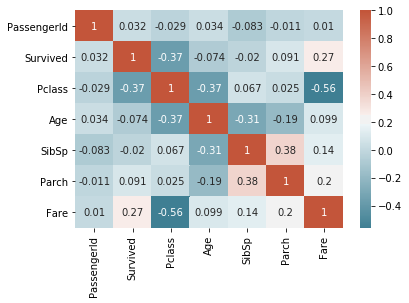

In [53]:
# calculating correlation 

# plot heatmap
corr = cleaned_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.diverging_palette(220,20, as_cmap=True))

In [86]:
"""
week positive correlation between Parch/SibSP and Survived/Fare
strong negative correlation between Pclass/Fare
"""

'\nweek positive correlation between Parch/SibSP and Survived/Fare\nstrong negative correlation between Pclass/Fare\n'

Scatterplot

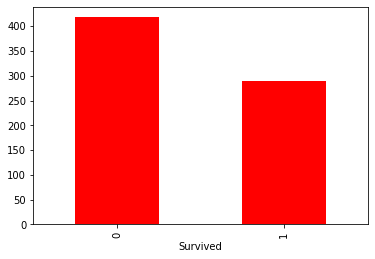

In [91]:
grouped_df = cleaned_df.groupby("Survived")
var = grouped_df['Sex'].count()

graph = var.plot(kind='bar',color='r')

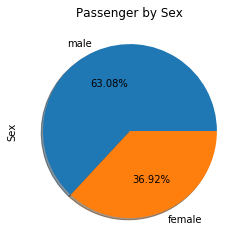

In [110]:

gender_stats = cleaned_df['Sex'].value_counts()
# gender_stats

gender_stats.plot(kind='pie', shadow = True, autopct = '%1.2f%%')
plt.title("Passenger by Sex")

plt.show()

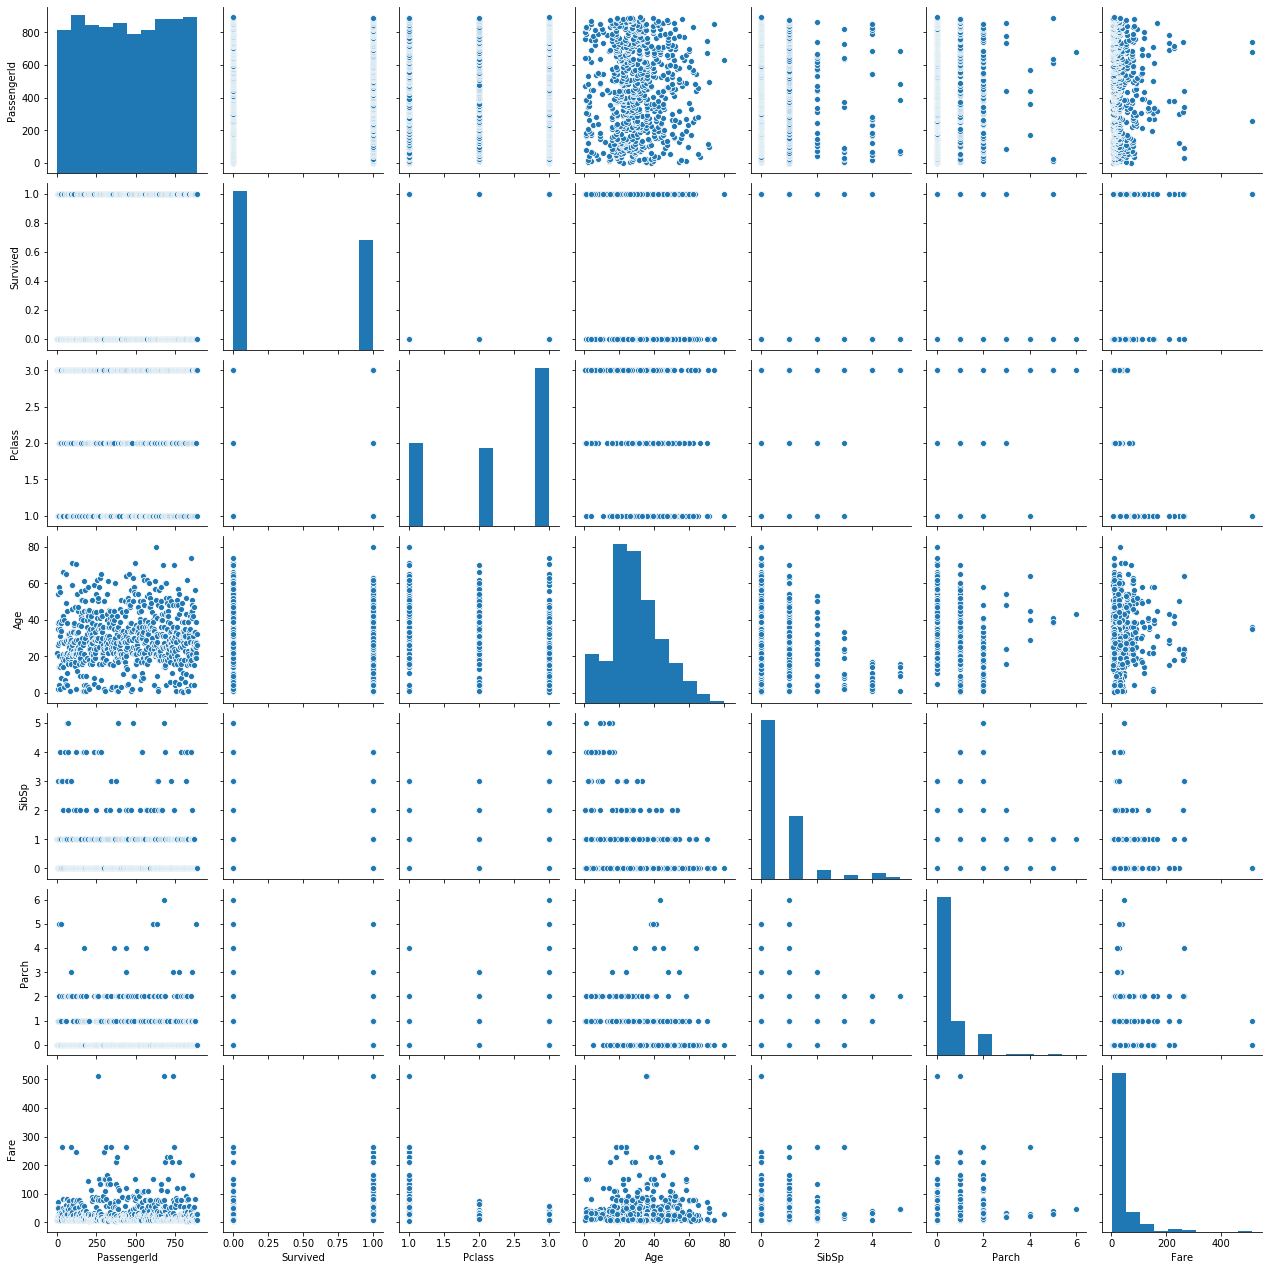

In [76]:
sns.pairplot(cleaned_df)

Histogram

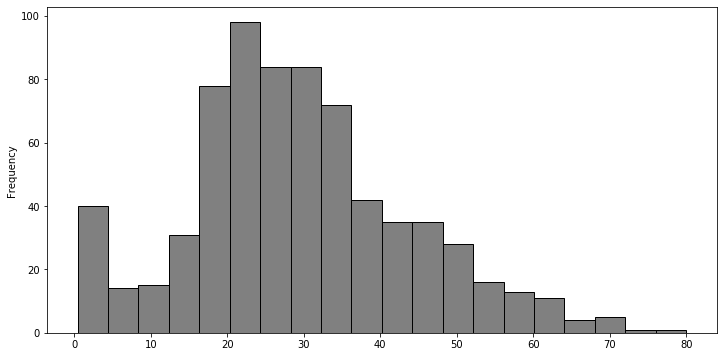

In [117]:
# histogram of survived 
cleaned_df['Age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

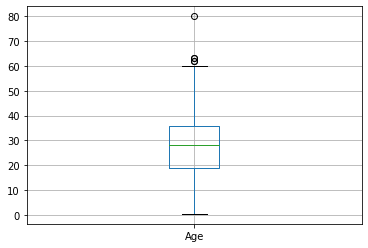

In [124]:
# box plots
survived_family = cleaned_df.loc[cleaned_df['Survived']==1]
survived_num = find_survived_family['PassengerId'].value_counts()

survived_family.boxplot('Age')